## Туториал по Seaborn
## https://seaborn.pydata.org/tutorial.html 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
# https://www.kaggle.com/c/titanic/data
data = pd.read_csv('titanic.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Непрерывные величины

## Гистограмма 

In [5]:
# filling missing values with median
age_median = data.Age.fillna(data.Age.median())
age_dropna = data.Age.dropna()

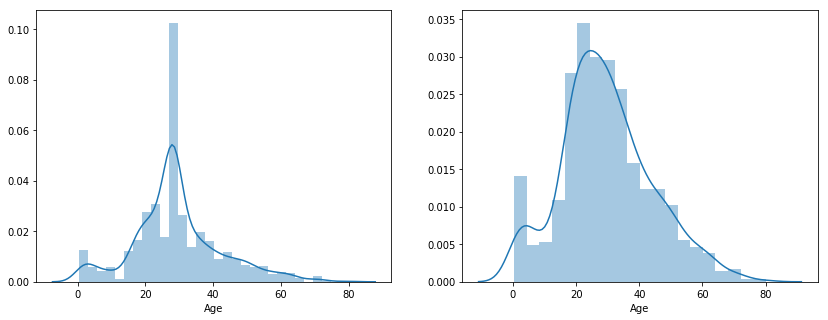

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.distplot(age_median, ax=axes[0])
sns.distplot(age_dropna, ax=axes[1])

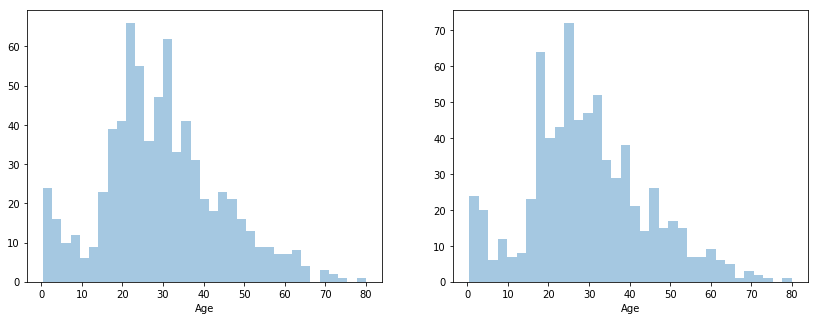

In [7]:
# можно менять количество и размер бинов (а еще отключать kde)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
n_bins = 35

sns.distplot(age_dropna, kde=False, bins=n_bins, ax=axes[0])

bins = np.linspace(age_dropna.min(), age_dropna.max(), n_bins)
sns.distplot(age_dropna, kde=False, bins=bins, ax=axes[1])

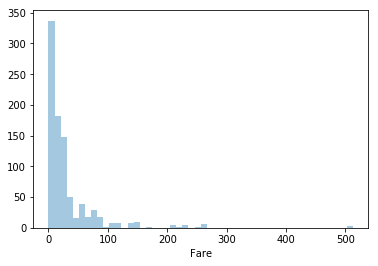

In [8]:
sns.distplot(data.Fare, kde=False)

##  Совместное распределение 

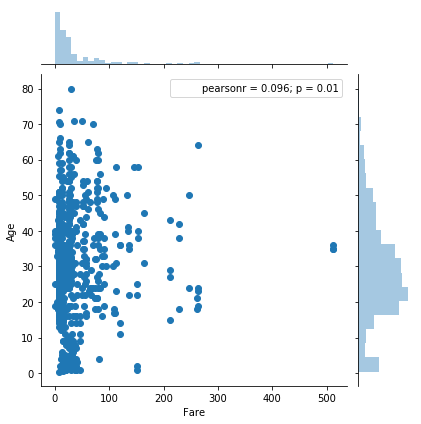

In [9]:
sns.jointplot(x='Fare', y='Age', data=data);

# Категориальные признаки

## Гистограмма для категорий

In [10]:
data.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

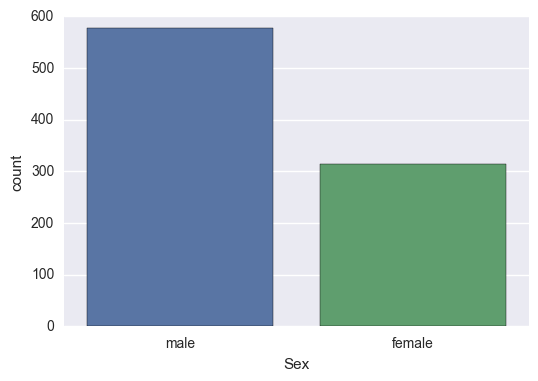

In [11]:
sns.countplot(data.Sex)

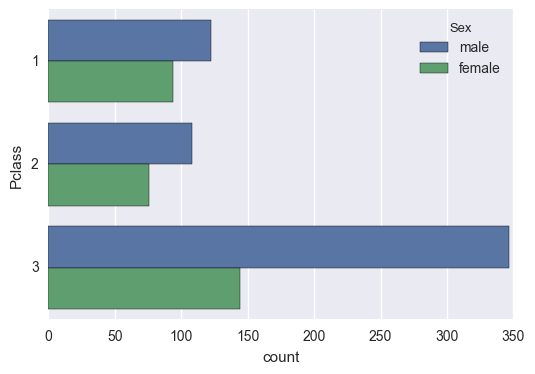

In [12]:
# А можно повернуть график и добавить еще одну категорию
sns.countplot(y=data.Pclass, hue=data.Sex)

## Совместное распределение категориального и непрерывного признака

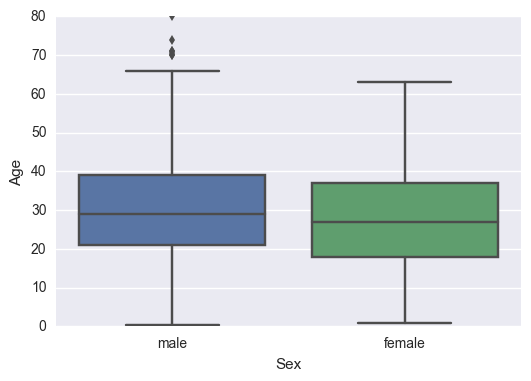

In [13]:
sns.boxplot(y=data.Age, x=data.Sex)

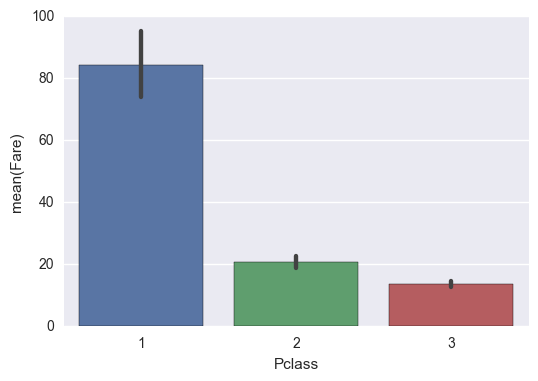

In [14]:
sns.barplot(y=data.Fare, x=data.Pclass)

In [16]:
age_median
data['new_age'] = age_median - age_median%10 

In [21]:
decade_passengers = data.groupby('new_age').PassengerId.count()
decade_passengers = decade_passengers.sort_index()

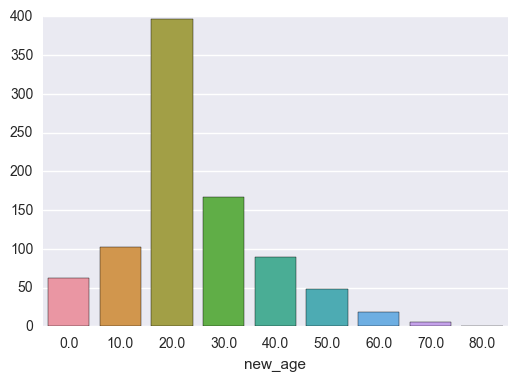

In [28]:
sns.barplot(x=decade_passengers.index, y=decade_passengers.values)